# 斜抛运动

## 概述

考虑一个斜抛的物体以初速度$V_0$被抛出，抛出方向为斜向上$\theta$角度。

由于空气阻力对于物体会有阻力作用，因此可以认为存在这样的关系：
$$
D=k V^2\tag{1}
$$

方向作用于速度的反方向。

不妨对速度进行水平和垂直方向的分解，各向受力如下：
$$
\begin{aligned}
D_x=-k V V_x
D_y=-k V V_y
V=\sqrt{V_x^2+V_y^2}
\end{aligned}\tag{2}
$$

假设物体质量为一个常数，那么各项因为阻力产生的加速度也与$D$成正比。假设最终的折合系数为$k$。构造如下迭代格式：

$$
\begin{aligned}
\begin{cases}
V_x(i)-V_x(i-1)&=&-k V(i-1) V_x(i-1)\cdot dt\\
V_y(i)-V_y(i-1)&=&-g-k V(i-1) V_x(i-1)\cdot dt\\
x(i)-x(i-1)&=&V_x(i)\cdot dt\\
y(i)-y(i-1)&=&V_y(i)\cdot dt
\end{cases}
\end{aligned}\tag{3}
$$

其中初始值：
$$
V_x(0)=V_0 \cos(\theta)\\
V_y(0)=V_0 \sin(\theta)\tag{4}
$$

为此编写了一个对象OTM(Oblicque-Throw-Motion)用以仿真此过程，支持自定义初速度、角度、仿真时间以及仿真步长，并最终将仿真的斜抛曲线绘制出来，并标注最高点。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
#define gravity and the impact parament of air
g=9.8
k=0.1
class OTM:
    global g
    global k
    def __init__(self,V0=1,theta=np.pi/4,t=5,dt=0.01):
        '''you need to input 4 paramaents inclding V0,theta,time span and time step
        otherwise we will use the default value above'''
        self.v0=V0
        self.theta=theta
        self.vx0=V0*math.cos(theta)
        self.vy0=V0*math.sin(theta)
        self.t=t
        self.dt=dt
        self.step=math.floor(t/dt) #to get how many steps
        pass
    def Solve(self):
        n=self.step
        vx=np.zeros(n)
        vy=np.zeros(n)
        x=np.zeros(n)
        y=np.zeros(n)
        vx[0]=self.vx0 #initial value
        vy[0]=self.vy0 #initial value
        for i in range(1,n): #iteration
            v=math.sqrt(vx[i-1]**2+vy[i-1]**2)
            vx[i]=vx[i-1]-k*v*vx[i-1]*self.dt
            vy[i]=vy[i-1]-(k*v*vy[i-1]+g)*self.dt
            x[i]=x[i-1]+vx[i]*self.dt
            y[i]=y[i-1]+vy[i]*self.dt
            pass
        self.vx=vx
        self.vy=vy
        self.x=x
        self.y=y
        pass
    def Showxy(self):
        plt.plot(self.x,self.y,color='b')
        plt.xlabel('x/m')
        plt.ylabel('y/m')
        plt.title('Initial Speed $V_0$='+str(self.v0)+\
            r', Initial Angle $\theta$='+str(self.theta*180/np.pi)[0:4])
        plt.grid(True)
        ymax=self.y.max() #to get the top of the path
        k=np.where(self.y==ymax)
        xmax=self.x[k]
        plt.scatter(xmax,ymax,color='r',alpha=0.5,marker='^')
        plt.text(xmax,ymax-3,'Top Point',weight="bold", color='g')
        pass
    pass

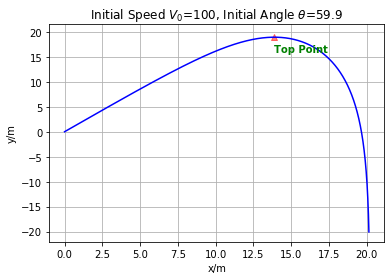

In [2]:
a=OTM(100,np.pi/3,6,0.001)
a.Solve()
a.Showxy()